## Packge and function

In [1]:
#Import libraries
import sys
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from percolation_basefunctions import *
from optimal_percolation_multiplex import *

## Data

In [2]:
file1 = 'list_multiplex_different_PDDM.txt'
multiplex_structure_dm_pd = load_dataset_into_dict_of_dict(file1,N=2)

pd_layer.txt
dm1_layer.txt


In [3]:
file1 = 'list_multiplex_different_controls.txt'
N=1000
multiplex_structure_controls = load_dataset_into_dict_of_dict(file1,N=2)

pd_Conlayer.txt
dm1_Conlayer.txt


### Check degree distribution of the networks

In [4]:
id_number_matchings = pd.read_csv('id_genename.csv')
id_number_matchings.columns = ['id','gene_name']
id_number_matchings.index = id_number_matchings['id']
id_number_matchings.head()

,id,gene_name
id,,
1,1,FAM46C
2,2,PLAT
3,3,EVI2B
4,4,KIF21A
5,5,PTPN3


In [5]:
# 1-470 id - gene 
total_nodes=[i for i in range(1,471)]
total_degreePD = dict.fromkeys(total_nodes, 0)
total_degreeDM = dict.fromkeys(total_nodes, 0)
total_degreePDCON = dict.fromkeys(total_nodes, 0)
total_degreeDMCON = dict.fromkeys(total_nodes, 0)
# total_degree

In [6]:
# multiplex_structure_controls
# multiplex_structure_dm_pd
del(multiplex_structure_dm_pd[0][0]) 
del(multiplex_structure_dm_pd[1][0]) 
del(multiplex_structure_controls[0][0]) 
del(multiplex_structure_controls[1][0]) 

In [7]:
for nodes in multiplex_structure_dm_pd[0]:  ### pd
    total_degreePD[nodes]=len(multiplex_structure_dm_pd[0][nodes])
    
for nodes in multiplex_structure_dm_pd[1]:  ### dm
    total_degreeDM[nodes]=len(multiplex_structure_dm_pd[1][nodes])

for nodes in multiplex_structure_controls[0]:  ### PD CON
    total_degreePDCON[nodes]=len(multiplex_structure_controls[0][nodes])
    
for nodes in multiplex_structure_controls[1]:  ### DM CON
    total_degreeDMCON[nodes]=len(multiplex_structure_controls[1][nodes])

In [8]:
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "font.size": 15,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

In [9]:
datadegree1pd =pd.DataFrame([list(total_degreePD.values()),\
                             list(total_degreePDCON.values()),\
                             id_number_matchings['gene_name']], \
                            columns = id_number_matchings['id']).transpose()
datadegree1pd.columns = ['PD','PD con','gene_name']
Ddegree1pd_sorted = datadegree1pd.sort_values('PD con',ascending=False)
Ddegree1pd_sorted.head()

,PD,PD con,gene_name
id,,,
419,12,16,PTPN20
271,10,16,MGST1
381,9,15,S100A3
164,9,13,FLT1
194,3,12,PDE8B


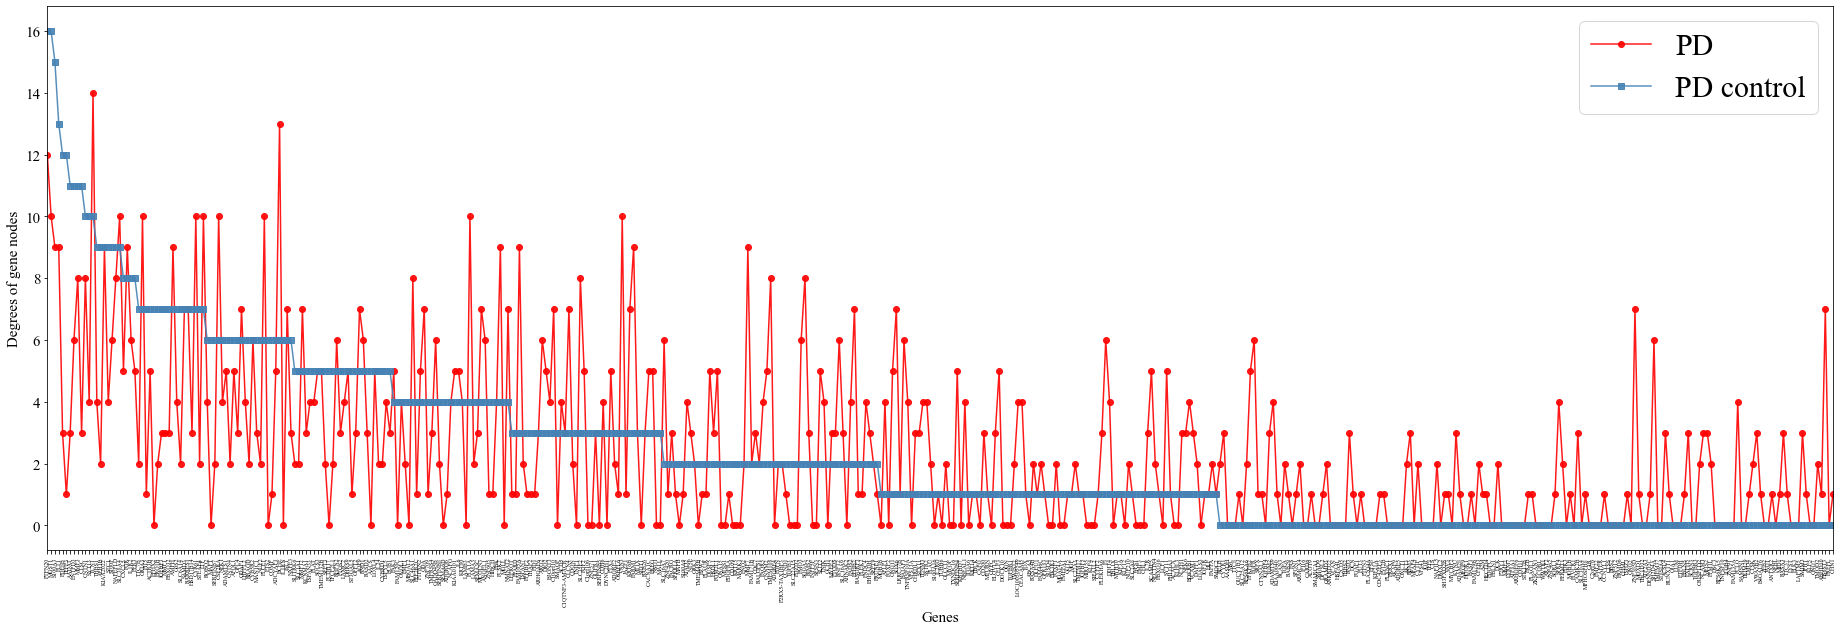

In [10]:
# total_degreePD
# total_degreePDCON
x = np.linspace(0, 1, 470)  # Sample data.
# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(32, 10))
config = {
    "font.family":'Times New Roman',
    "font.size": 30,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
ax.plot(x, Ddegree1pd_sorted.loc[:,'PD'], label='PD', color = 'r',alpha=0.9, marker = 'o')  # Plot some data on the axes.
ax.plot(x, Ddegree1pd_sorted.loc[:,'PD con'], label='PD control',color = 'SteelBlue',alpha=0.9, marker = 's')  # Plot more data on the axes...
ax.set_xlabel('Genes')  # Add an x-label to the axes.
ax.set_ylabel('Degrees of gene nodes')  # Add a y-label to the axes.
plt.xticks(x,Ddegree1pd_sorted.loc[:,'gene_name'],rotation=90, fontsize=5.86)

plt.xlim(0,1)
# ax.set_title("Gene degree plot")  # Add a title to the axes.
ax.legend()  # Add a legend
plt.savefig('PD_degree_i.pdf')
plt.show()

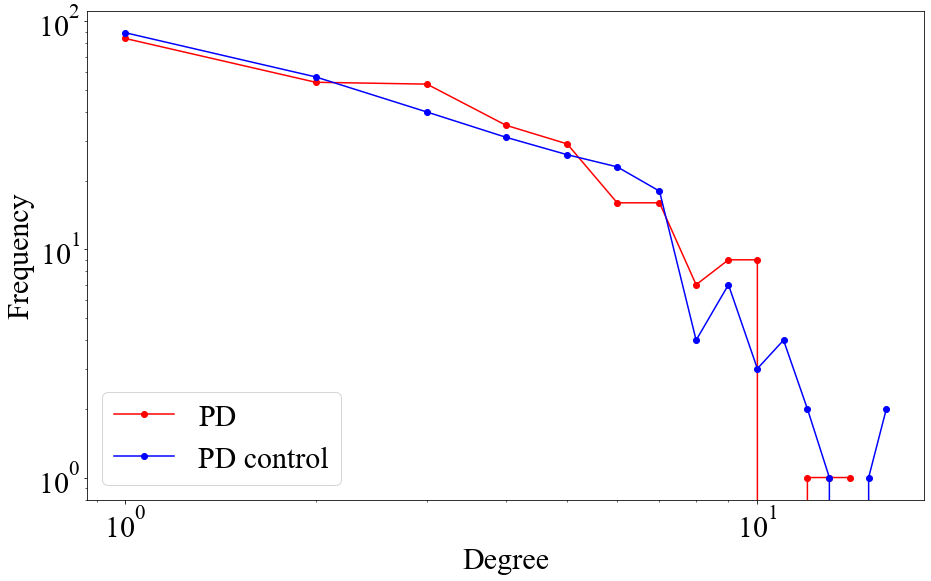

In [11]:
m=1
# G = nx.barabasi_albert_graph(1000, m)
Go1 = create_graph_fromedgelist(multiplex_structure_dm_pd[0])
degree_freq = nx.degree_histogram(Go1)
degrees = range(len(degree_freq))
plt.figure(figsize=(15, 9))
plt.loglog(degrees[m:], degree_freq[m:],'ro-',label = 'PD')
# plt.plot(degrees[m:], degree_freq[m:],'ro-',label = 'PD')

Go2 = create_graph_fromedgelist(multiplex_structure_controls[0])
degree_freq = nx.degree_histogram(Go2)
degrees = range(len(degree_freq))
plt.loglog(degrees[m:], degree_freq[m:],'bo-',label = 'PD control')
# plt.plot(degrees[m:], degree_freq[m:],'bo-',label = 'PD control')

plt.legend(loc='lower left')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.savefig('PD_degree_freq.pdf')
# plt.title()
plt.show()

In [12]:
datadegreeT2DM =pd.DataFrame([list(total_degreeDM.values()),\
                             list(total_degreeDMCON.values()),\
                             id_number_matchings['gene_name']], \
                            columns = id_number_matchings['id']).transpose()
datadegreeT2DM.columns = ['DM','DM con','gene_name']
DdegreeT2DM_sorted = datadegreeT2DM.sort_values('DM con',ascending=False)
DdegreeT2DM_sorted.head()

,DM,DM con,gene_name
id,,,
419,41,43,PTPN20
428,39,40,COMP
268,27,36,C2orf76
467,26,33,LTF
357,17,31,TMEM132B


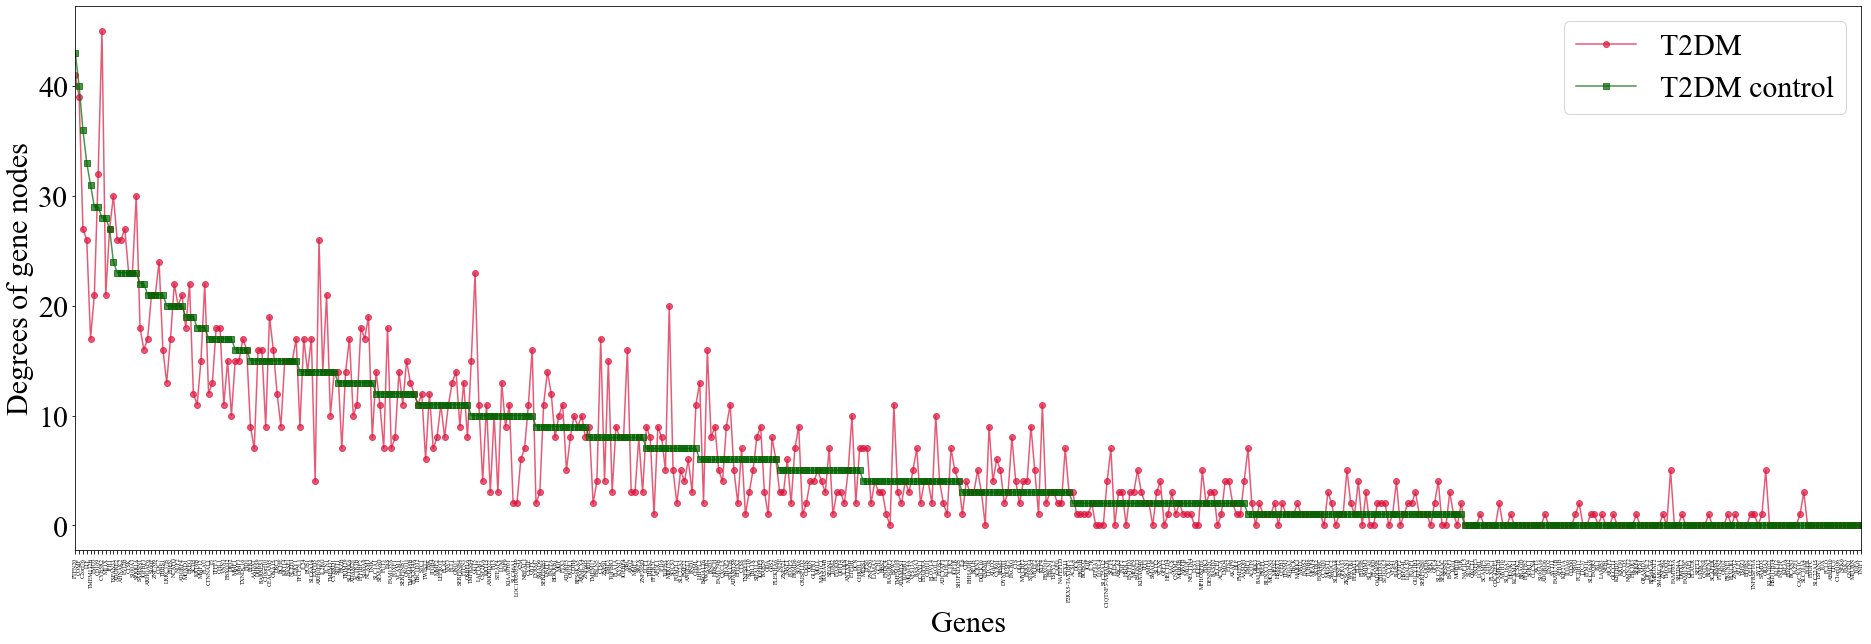

In [13]:
x = np.linspace(0, 1, 470)  # Sample data.
# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(32, 10))
config = {
    "font.family":'Times New Roman',
    "font.size": 30,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
ax.plot(x, DdegreeT2DM_sorted.loc[:,'DM'], label='T2DM', color = 'crimson',alpha=0.7, marker = 'o')  # Plot some data on the axes.
ax.plot(x, DdegreeT2DM_sorted.loc[:,'DM con'], label='T2DM control', color = 'darkgreen',alpha=0.7, marker = 's')  # Plot more data on the axes...
ax.set_xlabel('Genes')  # Add an x-label to the axes.
ax.set_ylabel('Degrees of gene nodes')  # Add a y-label to the axes.
plt.xticks(x,DdegreeT2DM_sorted.loc[:,'gene_name'],rotation=90, fontsize=5.86)
# ax.set_title("Gene degree plot")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.xlim(0,1)
plt.savefig('DM_degree_i.pdf')
plt.show()

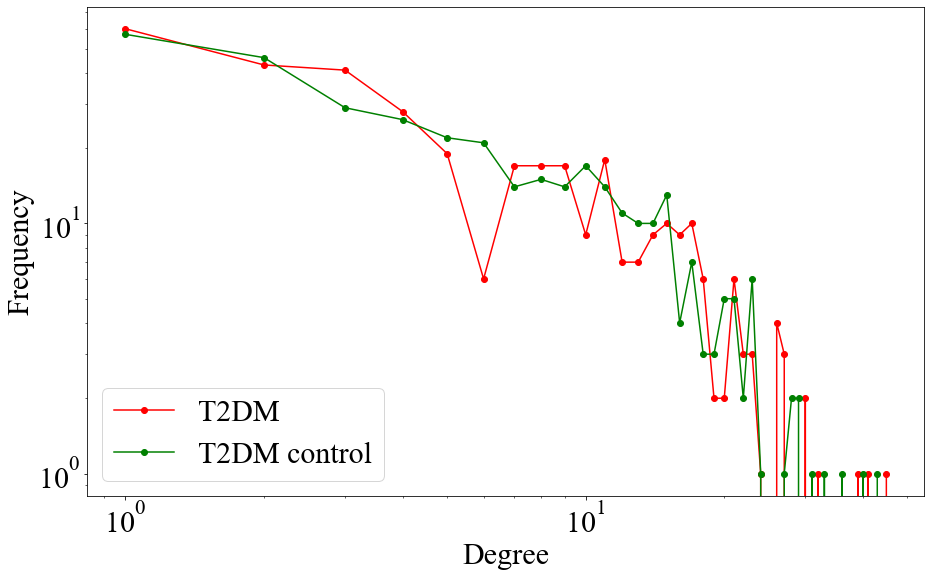

In [14]:
m=1
# G = nx.barabasi_albert_graph(1000, m)
Go1 = create_graph_fromedgelist(multiplex_structure_dm_pd[1])
degree_freq = nx.degree_histogram(Go1)
degrees = range(len(degree_freq))
plt.figure(figsize=(15, 9))
plt.loglog(degrees[m:], degree_freq[m:],'ro-',label = 'T2DM')
# plt.plot(degrees[m:], degree_freq[m:],'ro-',label = 'T2DM')

Go2 = create_graph_fromedgelist(multiplex_structure_controls[1])
degree_freq = nx.degree_histogram(Go2)
degrees = range(len(degree_freq))
# plt.plot(degrees[m:], degree_freq[m:],'go-',label = 'T2DM control')
plt.loglog(degrees[m:], degree_freq[m:],'go-',label = 'T2DM control')

plt.legend(loc='lower left')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.savefig('T2DM_degree_freq.pdf')
# plt.title()
plt.show()

## Graph generation from networkx

In [15]:
#### Create graph ####
Go1 = create_graph_fromedgelist(multiplex_structure_dm_pd[0])
#Check the size of the connected component of one of the layers, after all the link removals, the giant component represents the MCC
conn_componentsO1=sorted(nx.connected_components(Go1), key = len, reverse=True)

Go2 = create_graph_fromedgelist(multiplex_structure_dm_pd[1])
#Check the size of the connected component of one of the layers, after all the link removals, the giant component represents the MCC
conn_componentsO2=sorted(nx.connected_components(Go2), key = len, reverse=True)

multiplex_structure_graph = create_graph_fromedgelist(multiplex_structure_dm_pd)
multiplex_structure_graph.size()

678

In [16]:
# multiplex_structure_graph = create_graph_fromedgelist(multiplex_structure_dm_pd[1])
# multiplex_structure_graph.size()
# print the size of largest connected component #
print(len(conn_componentsO1[0]))
print(len(conn_componentsO2[0]))

303
359


In [17]:
conn_componentsO1[1]
multiplex_structure_CC= compute_connected_comp(multiplex_structure_dm_pd,2)

print(len(multiplex_structure_dm_pd[0]))
print(len(multiplex_structure_dm_pd[1]))

315
363


## Vital node determination

In [18]:
N = 471  ### 1-471 node number 
multiplex_structure = multiplex_structure_dm_pd
#################    Multiplex targeted strategies (without Pareto)   #################
HDA_total_target_nodes,HDA_size_nodes,HDA_steps_attack=targeted_attack_adaptive(multiplex_structure,N,computing_product_degree)
print()
EMD1step_total_target_nodes,EMD1step_size_nodes,EMD1step_steps_attack=targeted_attack_adaptive(multiplex_structure,N,EMD1step_ranking)
print()
EMD_total_target_nodes,EMD_size_nodes,EMD_steps_attack=targeted_attack_adaptive(multiplex_structure,N,EMDfullsteps_ranking)
print()
DCI_total_target_nodes,DCI_size_nodes, DCI_steps_attack=targeted_attack_adaptive(multiplex_structure,N,compute_ranking_DCI)
print()
DCIz_total_target_nodes,DCIz_size_nodes, DCIz_steps_attack=targeted_attack_adaptive(multiplex_structure,N,compute_ranking_DCIz)
print()

#################    Pareto Methods  with 3 objs     #################
#k-core with the others
kcore_EMD1step_ideal_total_target_nodes,kcore_EMD1step_ideal_size_nodes,kcore_EMD1step_ideal_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,kcore_ranking,EMD1step_ranking)
print()
kcore_EMD_ideal_total_target_nodes,kcore_EMD_ideal_size_nodes,kcore_EMD_ideal_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,kcore_ranking,EMDfullsteps_ranking)
print()
kcore_DCI_total_target_nodes,kcore_DCI_size_nodes, kcore_DCI_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,kcore_ranking,compute_ranking_DCI)
print()
kcore_DCIz_total_target_nodes,kcore_DCIz_size_nodes, kcore_DCIz_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,kcore_ranking,compute_ranking_DCIz)
print()

#CoreHD with the others
CoreHD_EMD1step_total_target_nodes,CoreHD_EMD1step_size_nodes,CoreHD_EMD1step_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,coreHD_ranking,EMD1step_ranking)
print()
CoreHD_EMD_total_target_nodes,CoreHD_EMD_size_nodes,CoreHD_EMD_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,coreHD_ranking,EMDfullsteps_ranking)
print()
CoreHD_DCI_total_target_nodes,CoreHD_DCI_size_nodes, CoreHD_DCI_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,coreHD_ranking,compute_ranking_DCI)
print()
CoreHD_DCIz_total_target_nodes,CoreHD_DCIz_size_nodes, CoreHD_DCIz_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,coreHD_ranking,compute_ranking_DCIz)
print()

#CI l=2 with the others
CI_2_EMD1step_total_target_nodes,CI_2_EMD1step_size_nodes,CI_2_EMD1step_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,compute_CI_2_ranking,EMD1step_ranking)
print()
CI_2_EMD_total_target_nodes,CI_2_EMD_size_nodes,CI_2_EMD_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,compute_CI_2_ranking,EMDfullsteps_ranking)
print()
CI_2_DCI_total_target_nodes,CI_2_DCI_size_nodes, CI_2_DCI_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,compute_CI_2_ranking,compute_ranking_DCI)
print()
CI_2_DCIz_total_target_nodes,CI_2_DCIz_size_nodes, CI_2_DCIz_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,compute_CI_2_ranking,compute_ranking_DCIz)
print()

#BPD with the others
BPD_EMD1step_total_target_nodes,BPD_EMD1step_size_nodes,BPD_EMD1step_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,BPalgorithm_ranking,EMD1step_ranking)
print()
BPD_EMD_total_target_nodes,BPD_EMD_size_nodes,BPD_EMD_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,BPalgorithm_ranking,EMDfullsteps_ranking)
print()
BPD_DCI_total_target_nodes,BPD_DCI_size_nodes, BPD_DCI_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,BPalgorithm_ranking,compute_ranking_DCI)
print()
BPD_DCIz_total_target_nodes,BPD_DCIz_size_nodes, BPD_DCIz_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,BPalgorithm_ranking,compute_ranking_DCIz)
print()

################    Pareto Methods  with 2 objs     #################

Pure_CoreHD_total_target_nodes,Pure_CoreHD_size_nodes,Pure_CoreHD_steps_attack=Pareto_ideal_targeted_attack_2objs(multiplex_structure,N,coreHD_ranking)
print()
Pure_CI_2_total_target_nodes,Pure_CI_2_size_nodes,Pure_CI_2_steps_attack=Pareto_ideal_targeted_attack_2objs(multiplex_structure,N,compute_CI_2_ranking)
print()

# PureBPD_total_target_nodes,PureBPD_size_nodes,PureBPD_steps_attack=Pareto_ideal_targeted_attack_2objs(multiplex_structure,N,BPalgorithm_ranking)
# print()   #### cost too much time #### 

Targeted strategy - using the function: computing_product_degree
# of nodes removed, size of LMCGC
0 180
np.sqrt(N) 21.702534414210707

Targeted strategy - using the function: EMD1step_ranking
# of nodes removed, size of LMCGC
0 180
np.sqrt(N) 21.702534414210707

Targeted strategy - using the function: EMDfullsteps_ranking
# of nodes removed, size of LMCGC
0 180
np.sqrt(N) 21.702534414210707

Targeted strategy - using the function: compute_ranking_DCI
# of nodes removed, size of LMCGC
0 180
np.sqrt(N) 21.702534414210707

Targeted strategy - using the function: compute_ranking_DCIz
# of nodes removed, size of LMCGC
0 180
np.sqrt(N) 21.702534414210707

Strategy based on the removal of the Pareto point closer
    to the Ideal Point - Pareto with kcore_ranking (single) and EMD1step_ranking (multi) - 3 objs pareto
# of nodes removed, size of LMCGC
0 180
np.sqrt(N) 21.702534414210707

Strategy based on the removal of the Pareto point closer
    to the Ideal Point - Pareto with kcore_ranking 

In [19]:
# CoreHD_CI_2_total_target_nodes,CoreHD_CI_2_size_nodes,CoreHD_CI_2_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,compute_CI_2_ranking,coreHD_ranking)
# print()

In [20]:
###### Results
results_dict={
"HDA":HDA_size_nodes,
"EMD1step":EMD1step_size_nodes,
"EMD":EMD_size_nodes,
"DCI":DCI_size_nodes,
"DCIz":DCIz_size_nodes,
"kcore-EMD1step":kcore_EMD1step_ideal_size_nodes,
"kcore-EMD":kcore_EMD_ideal_size_nodes,
"kcore-DCI":kcore_DCI_size_nodes,
"kcore-DCIz":kcore_DCIz_size_nodes,
"CoreHD-EMD1step":CoreHD_EMD1step_size_nodes,
"CoreHD-EMD":CoreHD_EMD_size_nodes,
"CoreHD-DCI":CoreHD_DCI_size_nodes,
"CoreHD-DCIz":CoreHD_DCIz_size_nodes,
"CI2-EMD1step":CI_2_EMD1step_size_nodes,
"CI2-EMD":CI_2_EMD_size_nodes,
"CI2-DCI":CI_2_DCI_size_nodes,
"CI2-DCIz":CI_2_DCIz_size_nodes,
"BPD-EMD1step":BPD_EMD1step_size_nodes,
"BPD-EMD":BPD_EMD_size_nodes,
"BPD-DCI":BPD_DCI_size_nodes,
"BPD-DCIz":BPD_DCIz_size_nodes,
"CoreHD - CoreHD":Pure_CoreHD_size_nodes,
"CI2 - CI2":Pure_CI_2_size_nodes
#"BPD - BPD":PureBPD_size_nodes
}

print(sorted(results_dict.items(),key= lambda x: x[1]))

PD_DM_target_nodes={
"HDA":HDA_total_target_nodes,
"EMD1step":EMD1step_total_target_nodes,
"EMD":EMD_total_target_nodes,
"DCI":DCI_total_target_nodes,
"DCIz":DCIz_total_target_nodes,
"kcore-EMD1step":kcore_EMD1step_ideal_total_target_nodes,
"kcore-EMD":kcore_EMD_ideal_total_target_nodes,
"kcore-DCI":kcore_DCI_total_target_nodes,
"kcore-DCIz":kcore_DCIz_total_target_nodes,
"CoreHD-EMD1step":CoreHD_EMD1step_total_target_nodes,
"CoreHD-EMD":CoreHD_EMD_total_target_nodes,
"CoreHD-DCI":CoreHD_DCI_total_target_nodes,
"CoreHD-DCIz":CoreHD_DCIz_total_target_nodes,
"CI2-EMD1step":CI_2_EMD1step_total_target_nodes,
"CI2-EMD":CI_2_EMD_total_target_nodes,
"CI2-DCI":CI_2_DCI_total_target_nodes,
"CI2-DCIz":CI_2_DCIz_total_target_nodes,
"BPD-EMD1step":BPD_EMD1step_total_target_nodes,
"BPD-EMD":BPD_EMD_total_target_nodes,
"BPD-DCI":BPD_DCI_total_target_nodes,
"BPD-DCIz":BPD_DCIz_total_target_nodes,
"CoreHD - CoreHD":Pure_CoreHD_total_target_nodes,
"CI2 - CI2":Pure_CI_2_total_target_nodes
#"BPD - BPD":PureBPD_size_nodes
}

[('CI2-EMD1step', 12), ('HDA', 13), ('kcore-DCIz', 13), ('CI2-EMD', 13), ('CI2 - CI2', 13), ('EMD', 14), ('DCI', 14), ('DCIz', 14), ('kcore-EMD1step', 14), ('kcore-DCI', 14), ('CoreHD-EMD', 14), ('CI2-DCI', 14), ('CI2-DCIz', 14), ('BPD-EMD', 14), ('BPD-DCI', 14), ('BPD-DCIz', 14), ('CoreHD-DCI', 15), ('EMD1step', 16), ('kcore-EMD', 16), ('CoreHD-EMD1step', 16), ('BPD-EMD1step', 16), ('CoreHD - CoreHD', 16), ('CoreHD-DCIz', 18)]


In [21]:
N = 471  ### 1-471 id number 
multiplex_structure = multiplex_structure_controls
#################    Multiplex targeted strategies (without Pareto)   #################

HDA_total_target_nodes,HDA_size_nodes,HDA_steps_attack=targeted_attack_adaptive(multiplex_structure,N,computing_product_degree)
print()
EMD1step_total_target_nodes,EMD1step_size_nodes,EMD1step_steps_attack=targeted_attack_adaptive(multiplex_structure,N,EMD1step_ranking)
print()
EMD_total_target_nodes,EMD_size_nodes,EMD_steps_attack=targeted_attack_adaptive(multiplex_structure,N,EMDfullsteps_ranking)
print()
DCI_total_target_nodes,DCI_size_nodes, DCI_steps_attack=targeted_attack_adaptive(multiplex_structure,N,compute_ranking_DCI)
print()
# DCIz_total_target_nodes,DCIz_size_nodes, DCIz_steps_attack=targeted_attack_adaptive(multiplex_structure,N,compute_ranking_DCIz)
# print()

#################    Pareto Methods  with 3 objs     #################
#k-core with the others

kcore_EMD1step_ideal_total_target_nodes,kcore_EMD1step_ideal_size_nodes,kcore_EMD1step_ideal_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,kcore_ranking,EMD1step_ranking)
print()
kcore_EMD_ideal_total_target_nodes,kcore_EMD_ideal_size_nodes,kcore_EMD_ideal_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,kcore_ranking,EMDfullsteps_ranking)
print()
kcore_DCI_total_target_nodes,kcore_DCI_size_nodes, kcore_DCI_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,kcore_ranking,compute_ranking_DCI)
print()
kcore_DCIz_total_target_nodes,kcore_DCIz_size_nodes, kcore_DCIz_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,kcore_ranking,compute_ranking_DCIz)
print()

#CoreHD with the others

CoreHD_EMD1step_total_target_nodes,CoreHD_EMD1step_size_nodes,CoreHD_EMD1step_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,coreHD_ranking,EMD1step_ranking)
print()
CoreHD_EMD_total_target_nodes,CoreHD_EMD_size_nodes,CoreHD_EMD_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,coreHD_ranking,EMDfullsteps_ranking)
print()
CoreHD_DCI_total_target_nodes,CoreHD_DCI_size_nodes, CoreHD_DCI_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,coreHD_ranking,compute_ranking_DCI)
print()
CoreHD_DCIz_total_target_nodes,CoreHD_DCIz_size_nodes, CoreHD_DCIz_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,coreHD_ranking,compute_ranking_DCIz)
print()

#CI l=2 with the others

CI_2_EMD1step_total_target_nodes,CI_2_EMD1step_size_nodes,CI_2_EMD1step_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,compute_CI_2_ranking,EMD1step_ranking)
print()
CI_2_EMD_total_target_nodes,CI_2_EMD_size_nodes,CI_2_EMD_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,compute_CI_2_ranking,EMDfullsteps_ranking)
print()
CI_2_DCI_total_target_nodes,CI_2_DCI_size_nodes, CI_2_DCI_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,compute_CI_2_ranking,compute_ranking_DCI)
print()
CI_2_DCIz_total_target_nodes,CI_2_DCIz_size_nodes, CI_2_DCIz_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,compute_CI_2_ranking,compute_ranking_DCIz)
print()

#BPD with the others
BPD_EMD1step_total_target_nodes,BPD_EMD1step_size_nodes,BPD_EMD1step_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,BPalgorithm_ranking,EMD1step_ranking)
print()
BPD_EMD_total_target_nodes,BPD_EMD_size_nodes,BPD_EMD_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,BPalgorithm_ranking,EMDfullsteps_ranking)
print()
BPD_DCI_total_target_nodes,BPD_DCI_size_nodes, BPD_DCI_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,BPalgorithm_ranking,compute_ranking_DCI)
print()
# BPD_DCIz_total_target_nodes,BPD_DCIz_size_nodes, BPD_DCIz_steps_attack=Pareto_ideal_targeted_attack_3objs(multiplex_structure,N,BPalgorithm_ranking,compute_ranking_DCIz)
# print()

################    Pareto Methods  with 2 objs     #################

Pure_CoreHD_total_target_nodes,Pure_CoreHD_size_nodes,Pure_CoreHD_steps_attack=Pareto_ideal_targeted_attack_2objs(multiplex_structure,N,coreHD_ranking)
print()
Pure_CI_2_total_target_nodes,Pure_CI_2_size_nodes,Pure_CI_2_steps_attack=Pareto_ideal_targeted_attack_2objs(multiplex_structure,N,compute_CI_2_ranking)
print()
# PureBPD_total_target_nodes,PureBPD_size_nodes,PureBPD_steps_attack=Pareto_ideal_targeted_attack_2objs(multiplex_structure,N,BPalgorithm_ranking)
# print()


Targeted strategy - using the function: computing_product_degree
# of nodes removed, size of LMCGC
0 188
np.sqrt(N) 21.702534414210707

Targeted strategy - using the function: EMD1step_ranking
# of nodes removed, size of LMCGC
0 188
np.sqrt(N) 21.702534414210707

Targeted strategy - using the function: EMDfullsteps_ranking
# of nodes removed, size of LMCGC
0 188
np.sqrt(N) 21.702534414210707

Targeted strategy - using the function: compute_ranking_DCI
# of nodes removed, size of LMCGC
0 188
np.sqrt(N) 21.702534414210707

Strategy based on the removal of the Pareto point closer
    to the Ideal Point - Pareto with kcore_ranking (single) and EMD1step_ranking (multi) - 3 objs pareto
# of nodes removed, size of LMCGC
0 188
np.sqrt(N) 21.702534414210707

Strategy based on the removal of the Pareto point closer
    to the Ideal Point - Pareto with kcore_ranking (single) and EMDfullsteps_ranking (multi) - 3 objs pareto
# of nodes removed, size of LMCGC
0 188
np.sqrt(N) 21.702534414210707

Str

In [22]:
###### Results
results_dict_controls={
"HDA":HDA_size_nodes,
"EMD1step":EMD1step_size_nodes,
"EMD":EMD_size_nodes,
"DCI":DCI_size_nodes,
# "DCIz":DCIz_size_nodes,
"kcore-EMD1step":kcore_EMD1step_ideal_size_nodes,
"kcore-EMD":kcore_EMD_ideal_size_nodes,
"kcore-DCI":kcore_DCI_size_nodes,
"kcore-DCIz":kcore_DCIz_size_nodes,
"CoreHD-EMD1step":CoreHD_EMD1step_size_nodes,
"CoreHD-EMD":CoreHD_EMD_size_nodes,
"CoreHD-DCI":CoreHD_DCI_size_nodes,
"CoreHD-DCIz":CoreHD_DCIz_size_nodes,
"CI2-EMD1step":CI_2_EMD1step_size_nodes,
"CI2-EMD":CI_2_EMD_size_nodes,
"CI2-DCI":CI_2_DCI_size_nodes,
"CI2-DCIz":CI_2_DCIz_size_nodes,
"BPD-EMD1step":BPD_EMD1step_size_nodes,
"BPD-EMD":BPD_EMD_size_nodes,
"BPD-DCI":BPD_DCI_size_nodes,
# "BPD-DCIz":BPD_DCIz_size_nodes,
"CoreHD - CoreHD":Pure_CoreHD_size_nodes,
"CI2 - CI2":Pure_CI_2_size_nodes
#"BPD - BPD":PureBPD_size_nodes
}

print(sorted(results_dict_controls.items(),key= lambda x: x[1]))

Control_target_nodes={
"HDA":HDA_total_target_nodes,
"EMD1step":EMD1step_total_target_nodes,
"EMD":EMD_total_target_nodes,
#"DCI":DCI_total_target_nodes,
"DCIz":DCIz_total_target_nodes,
"kcore-EMD1step":kcore_EMD1step_ideal_total_target_nodes,
"kcore-EMD":kcore_EMD_ideal_total_target_nodes,
"kcore-DCI":kcore_DCI_total_target_nodes,
"kcore-DCIz":kcore_DCIz_total_target_nodes,
"CoreHD-EMD1step":CoreHD_EMD1step_total_target_nodes,
"CoreHD-EMD":CoreHD_EMD_total_target_nodes,
"CoreHD-DCI":CoreHD_DCI_total_target_nodes,
"CoreHD-DCIz":CoreHD_DCIz_total_target_nodes,
"CI2-EMD1step":CI_2_EMD1step_total_target_nodes,
"CI2-EMD":CI_2_EMD_total_target_nodes,
"CI2-DCI":CI_2_DCI_total_target_nodes,
"CI2-DCIz":CI_2_DCIz_total_target_nodes,
"BPD-EMD1step":BPD_EMD1step_total_target_nodes,
"BPD-EMD":BPD_EMD_total_target_nodes,
"BPD-DCI":BPD_DCI_total_target_nodes,
#"BPD-DCIz":BPD_DCIz_total_target_nodes,
"CoreHD - CoreHD":Pure_CoreHD_total_target_nodes,
"CI2 - CI2":Pure_CI_2_total_target_nodes
#"BPD - BPD":PureBPD_size_nodes
}

[('HDA', 16), ('EMD', 16), ('kcore-EMD1step', 16), ('CI2-DCI', 16), ('BPD-EMD', 16), ('kcore-EMD', 17), ('kcore-DCIz', 17), ('CoreHD-EMD1step', 17), ('CoreHD-DCI', 17), ('CoreHD-DCIz', 17), ('CI2-EMD1step', 17), ('CI2-DCIz', 17), ('kcore-DCI', 18), ('CI2 - CI2', 18), ('EMD1step', 19), ('DCI', 19), ('CI2-EMD', 19), ('BPD-EMD1step', 19), ('BPD-DCI', 19), ('CoreHD-EMD', 20), ('CoreHD - CoreHD', 22)]


## LMCC and visualization

In [23]:
nodes_to_print = PD_DM_target_nodes['CI2-EMD1step']
print(len(PD_DM_target_nodes['CI2-EMD1step']))
print(list(id_number_matchings.loc[[j for sub in nodes_to_print for j in sub],'gene_name']))

12
['PTPN20', 'TCN1', 'CYB5R2', 'LTF', 'NCAPG', 'TSPAN33', 'FMO3', 'FLT1', 'S100A3', 'S100P', 'CYR61', 'VWA5B2']


In [24]:
multiplex_new=cPickle.loads(cPickle.dumps(multiplex_structure_dm_pd, -1))
multiplex_structure = multiplex_structure_dm_pd

In [25]:
print(PD_DM_target_nodes.keys())
print(Control_target_nodes.keys())

dict_keys(['HDA', 'EMD1step', 'EMD', 'DCI', 'DCIz', 'kcore-EMD1step', 'kcore-EMD', 'kcore-DCI', 'kcore-DCIz', 'CoreHD-EMD1step', 'CoreHD-EMD', 'CoreHD-DCI', 'CoreHD-DCIz', 'CI2-EMD1step', 'CI2-EMD', 'CI2-DCI', 'CI2-DCIz', 'BPD-EMD1step', 'BPD-EMD', 'BPD-DCI', 'BPD-DCIz', 'CoreHD - CoreHD', 'CI2 - CI2'])
dict_keys(['HDA', 'EMD1step', 'EMD', 'DCIz', 'kcore-EMD1step', 'kcore-EMD', 'kcore-DCI', 'kcore-DCIz', 'CoreHD-EMD1step', 'CoreHD-EMD', 'CoreHD-DCI', 'CoreHD-DCIz', 'CI2-EMD1step', 'CI2-EMD', 'CI2-DCI', 'CI2-DCIz', 'BPD-EMD1step', 'BPD-EMD', 'BPD-DCI', 'CoreHD - CoreHD', 'CI2 - CI2'])


In [26]:
# generate conn size list based on block target step removal # 
def conn_set_list(multiplex_structure_dm_pd, block_target):
    conn_set_list1 = []
    conn_set_list2 = []
    #multiplex_new=cPickle.loads(cPickle.dumps(multiplex_structure_dm_pd, -1))    
    for iter_1 in range(1,len(block_target)+1):
        target_list = block_target[0:iter_1]
#         print(target_list)
        multiplex_new=cPickle.loads(cPickle.dumps(multiplex_structure_dm_pd, -1))
        for target in target_list:
            for layer_ID in multiplex_structure:
                if target[0] in multiplex_structure[layer_ID]:
                    #print(target)
                    for j in multiplex_structure[layer_ID][target[0]]: 
                        if j in multiplex_new[layer_ID][target[0]]:
                            multiplex_new[layer_ID][target[0]].remove(j)
                        if target[0] in multiplex_new[layer_ID][j]:
                            multiplex_new[layer_ID][j].remove(target[0])
        multiplex_next=cPickle.loads(cPickle.dumps(multiplex_new, -1))
        
        N = 1000
        while(1):
                flag = 0
                #multiplex_new = copy.deepcopy(multiplex_next)
                multiplex_new = cPickle.loads(cPickle.dumps(multiplex_next, -1))
                #Computing the connected components of all the layers in the multiplex
                list_connected_components=compute_connected_comp(multiplex_new,N)                   
                for layer_ID in multiplex_new:
                    for i in multiplex_new[layer_ID].keys():
                        for j in multiplex_new[layer_ID][i]:
                            if i < j:
                                for layer_check in range(0,len(multiplex_new)):
                                    #remove the links whose nodes don't belong to the same component in the different layers
                                    if list_connected_components[layer_check][i] != list_connected_components[layer_check][j] \
                                    or list_connected_components[layer_check][i] == -100000 or \
                                    list_connected_components[layer_check][j] == -100000:
                                            multiplex_next[layer_ID][i].remove(j)
                                            multiplex_next[layer_ID][j].remove(i)
                                            flag = 1
                    #Computing the connected components of all the layers in the multiplex
                    list_connected_components=compute_connected_comp_layer(multiplex_new,N,layer_ID,list_connected_components)
                #If no changes happened in a cycle, then exit!
                if flag == 0:
                    break
        G = create_graph_fromedgelist(multiplex_next[0])
        #Check the size of the connected component of one of the layers, after all the link removals, the giant component represents the MCC
        conn_components=sorted(nx.connected_components(G), key = len, reverse=True)
        G2 = create_graph_fromedgelist(multiplex_next[1])
        #Check the size of the connected component of one of the layers, after all the link removals, the giant component represents the MCC
        conn_components2=sorted(nx.connected_components(G2), key = len, reverse=True)
#         print(len(conn_components2[0]))
#         print(len(conn_components[0]))
        conn_set_list1.append(len(conn_components[0]))
        conn_set_list2.append(len(conn_components2[0]))
#         print(iter_1)
    
    return conn_set_list1,conn_set_list2

In [27]:
Multi_conn_set_list1 = {}
Multi_conn_set_list2 = {}
for key_method in PD_DM_target_nodes.keys():
    print(key_method)
    multiplex_new=cPickle.loads(cPickle.dumps(multiplex_structure_dm_pd, -1))
    multiplex_structure = multiplex_structure_dm_pd
    ##
    block_target = PD_DM_target_nodes[key_method]
    # for target in block_target[1:10]:
    ### remove linking containing the block target nodes ### 
    connsetlist1,connsetlist2 = conn_set_list(multiplex_structure_dm_pd, block_target)
    Multi_conn_set_list1[key_method] = connsetlist1
    Multi_conn_set_list2[key_method] = connsetlist2

HDA
EMD1step
EMD
DCI
DCIz
kcore-EMD1step
kcore-EMD
kcore-DCI
kcore-DCIz
CoreHD-EMD1step
CoreHD-EMD
CoreHD-DCI
CoreHD-DCIz
CI2-EMD1step
CI2-EMD
CI2-DCI
CI2-DCIz
BPD-EMD1step
BPD-EMD
BPD-DCI
BPD-DCIz
CoreHD - CoreHD
CI2 - CI2


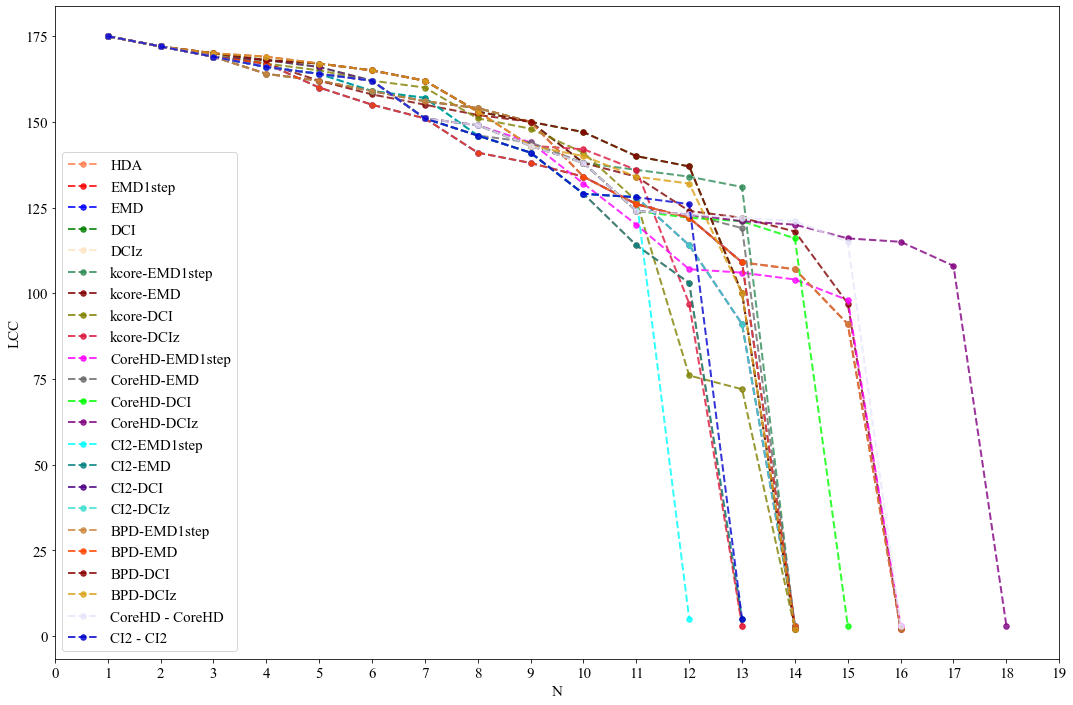

In [28]:
# connsetlist1
# connsetlist2
plt.figure(figsize=(18, 12))
config = {
    "font.family":'Times New Roman',
    "font.size": 15,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
color_list = ['coral','red','blue','green','bisque',\
              'seagreen','maroon','olive','crimson','fuchsia',\
              'dimgray','lime','purple','cyan','teal',\
              'indigo','turquoise','peru','orangered','darkred',\
              'goldenrod','lavender','mediumblue','magenta','cornflowerblue',\
              'navy','gold','black','skyblue','dodgerblue'
             ]

for key_method,color_i in zip(Multi_conn_set_list1.keys(), color_list):
    plt.plot(range(1,len(Multi_conn_set_list1[key_method])+1),Multi_conn_set_list1[key_method],\
             lw=2, marker='.', ms=11,color=color_i,label = key_method, alpha = 0.8, linestyle = '--') # square
    
plt.xlabel('N')
plt.ylabel('LCC')
my_x_ticks = np.arange(0, 20, 1)
plt.xticks(my_x_ticks)
plt.legend()
plt.savefig('Percol.pdf')
plt.show()
# plt.savefig('line_plot_hq.png', dpi=300)  


In [29]:
print(sorted(results_dict.items(),key= lambda x: x[1]))

[('CI2-EMD1step', 12), ('HDA', 13), ('kcore-DCIz', 13), ('CI2-EMD', 13), ('CI2 - CI2', 13), ('EMD', 14), ('DCI', 14), ('DCIz', 14), ('kcore-EMD1step', 14), ('kcore-DCI', 14), ('CoreHD-EMD', 14), ('CI2-DCI', 14), ('CI2-DCIz', 14), ('BPD-EMD', 14), ('BPD-DCI', 14), ('BPD-DCIz', 14), ('CoreHD-DCI', 15), ('EMD1step', 16), ('kcore-EMD', 16), ('CoreHD-EMD1step', 16), ('BPD-EMD1step', 16), ('CoreHD - CoreHD', 16), ('CoreHD-DCIz', 18)]


In [30]:
Multi_conn_set_list1.keys()

dict_keys(['HDA', 'EMD1step', 'EMD', 'DCI', 'DCIz', 'kcore-EMD1step', 'kcore-EMD', 'kcore-DCI', 'kcore-DCIz', 'CoreHD-EMD1step', 'CoreHD-EMD', 'CoreHD-DCI', 'CoreHD-DCIz', 'CI2-EMD1step', 'CI2-EMD', 'CI2-DCI', 'CI2-DCIz', 'BPD-EMD1step', 'BPD-EMD', 'BPD-DCI', 'BPD-DCIz', 'CoreHD - CoreHD', 'CI2 - CI2'])

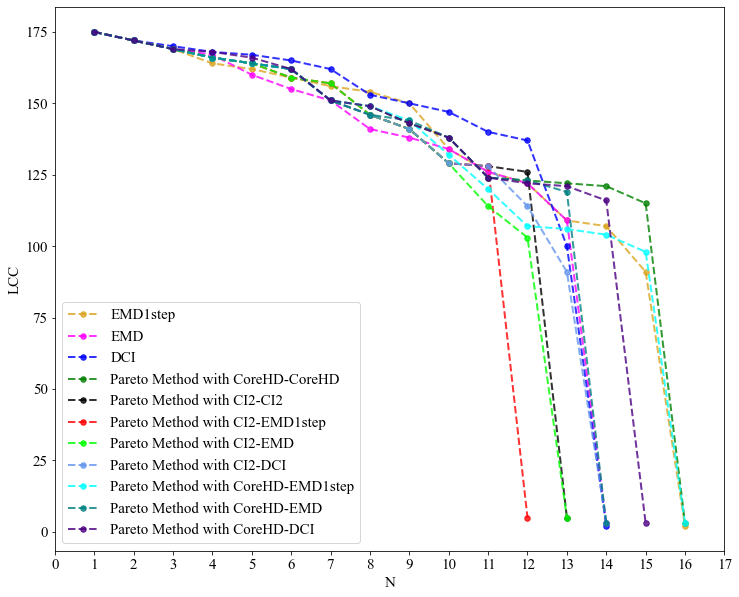

In [31]:
# connsetlist1
# connsetlist2
plt.figure(figsize=(12, 10))
config = {
    "font.family":'Times New Roman',
    "font.size": 15,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
color_list = [
              'goldenrod','magenta','blue','green','black',\
              'red','lime','cornflowerblue','cyan','teal',\
              'indigo','turquoise','peru','orangered','darkred',\
              'lavender','mediumblue','magenta','cornflowerblue',\
              'navy','gold','black','skyblue','dodgerblue'
             ]

Multi_select_list = ['EMD1step', 'EMD', 'DCI',
                     'CoreHD - CoreHD','CI2 - CI2',\
                     'CI2-EMD1step', 'CI2-EMD', 'CI2-DCI',\
                     'CoreHD-EMD1step', 'CoreHD-EMD', 'CoreHD-DCI'
                    ]
Multi_select_name_list = ['EMD1step', 'EMD', 'DCI',\
                          'Pareto Method with CoreHD-CoreHD', \
                          'Pareto Method with CI2-CI2',\
                          'Pareto Method with CI2-EMD1step',\
                          'Pareto Method with CI2-EMD',\
                          'Pareto Method with CI2-DCI',\
                          'Pareto Method with CoreHD-EMD1step',\
                          'Pareto Method with CoreHD-EMD',\
                          'Pareto Method with CoreHD-DCI'
                         ]                         

for key_method,color_i,key_methodlabel in zip(Multi_select_list, color_list, Multi_select_name_list):
    plt.plot(range(1,len(Multi_conn_set_list1[key_method])+1),Multi_conn_set_list1[key_method],\
             lw=2, marker='.', ms=11,color=color_i,label = key_methodlabel, alpha = 0.8, linestyle = '--') # square

plt.xlabel('N')
plt.ylabel('LCC')
my_x_ticks = np.arange(0, 18, 1)
plt.xticks(my_x_ticks)
plt.legend(loc = 'lower left')
plt.savefig('Figure6_c_Perc.pdf')
plt.show() 


## Filtering of nodes

In [32]:
# print(PD_DM_target_nodes.keys())
# print(Control_target_nodes.keys())
selected_nodes_pddm = PD_DM_target_nodes['CI2-EMD1step']
selected_nodes_control = Control_target_nodes['CI2-EMD1step']
print(list(id_number_matchings.loc[[j for sub in selected_nodes_pddm for j in sub],'gene_name']))
print(list(id_number_matchings.loc[[j for sub in selected_nodes_control for j in sub],'gene_name']))

['PTPN20', 'TCN1', 'CYB5R2', 'LTF', 'NCAPG', 'TSPAN33', 'FMO3', 'FLT1', 'S100A3', 'S100P', 'CYR61', 'VWA5B2']
['PTPN20', 'S100A3', 'S100P', 'COMP', 'TMEM132B', 'THBS1', 'AADAT', 'MMP3', 'MGST1', 'CYB5R2', 'FLT1', 'TPPP3', 'DHRS9', 'MMP1', 'CTSC', 'ENTPD3', 'TCN1']


In [33]:
### remove vital nodes in control multiplex network
target_inter = list(set([j for sub in selected_nodes_pddm for j in sub])\
                    .difference(set([j for sub in selected_nodes_control for j in sub])))
target_inter  #### PPDM genes with the removal of cons target genes #### 
print(list(id_number_matchings.loc[target_inter,'gene_name']))
# target_inter = list(set(targetPDDM).difference(set(targetCons)))

['NCAPG', 'LTF', 'FMO3', 'CYR61', 'VWA5B2', 'TSPAN33']


In [34]:
### further remove degree product > 100
degree_dic = computing_product_degree(multiplex_structure_controls,N)  ### compute the product of degree. 
degree_dic
degreelist = [degree_dic[i] for i in target_inter]
degreelist
a = np.array([i<100 for i in degreelist])
b = np.array(target_inter)
print(list(id_number_matchings.loc[b[a],'gene_name']))

['NCAPG', 'FMO3', 'CYR61', 'VWA5B2']


## Remaining network residues

In [35]:
multiplex_new=cPickle.loads(cPickle.dumps(multiplex_structure_dm_pd, -1))
# multiplex_new

In [36]:
# block_target = CoreHD_EMD1step_total_target_nodes ###### 
block_target = PD_DM_target_nodes['CI2-EMD1step'] ###### 
multiplex_structure = multiplex_structure_dm_pd

In [37]:
# for target in block_target[1:10]:
### remove linking containing the block target nodes ### 
for target in block_target:
        for layer_ID in multiplex_structure:
            if target[0] in multiplex_structure[layer_ID]:
                #print(target)
                for j in multiplex_structure[layer_ID][target[0]]: 
                    if j in multiplex_new[layer_ID][target[0]]:
                        multiplex_new[layer_ID][target[0]].remove(j)
                    if target[0] in multiplex_new[layer_ID][j]:
                        multiplex_new[layer_ID][j].remove(target[0])
multiplex_next=cPickle.loads(cPickle.dumps(multiplex_new, -1))

In [38]:
list_connected_components=compute_connected_comp(multiplex_new,10)
list_connected_components

{0: {0: -100000,
  1: 1,
  2: 1,
  3: 1,
  4: -100000,
  5: -100000,
  6: 1,
  7: 1,
  8: -100000,
  9: 1,
  11: 1,
  12: 1,
  14: 1,
  15: 1,
  19: 1,
  20: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  31: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  39: 1,
  40: 1,
  43: 1,
  46: 1,
  50: 1,
  51: 1,
  53: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  67: 1,
  68: 1,
  71: 1,
  73: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  84: 1,
  85: 1,
  87: 1,
  91: 1,
  92: 1,
  97: 1,
  99: 1,
  101: 1,
  102: 1,
  104: 1,
  105: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  116: 1,
  117: 1,
  118: 1,
  119: 1,
  121: 1,
  122: 1,
  123: 1,
  124: 1,
  126: 1,
  127: 1,
  129: 1,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  139: 1,
  140: 1,
  141: 1,
  144: 1,
  146: 1,
  147: 1,
  151: 1,
  152: 1,
  153: 1,
  154: 1,
  155: 1,
  157: 1,
  159: 1,
  160: 1,
  161: 1,
  162: 1,
  165: 1,
  166: 1,
  16

In [39]:
N = 471
while(1):
        flag = 0
        #multiplex_new = copy.deepcopy(multiplex_next)
        multiplex_new = cPickle.loads(cPickle.dumps(multiplex_structure_dm_pd, -1))
        #Computing the connected components of all the layers in the multiplex
        list_connected_components=compute_connected_comp(multiplex_new,N)                   
        for layer_ID in multiplex_new:
            for i in multiplex_new[layer_ID].keys():
                for j in multiplex_new[layer_ID][i]:
                    if i < j:
                        for layer_check in range(0,len(multiplex_new)):
                            #remove the links that don't belong to the same component in the different layers
                            if list_connected_components[layer_check][i] != list_connected_components[layer_check][j] \
                            or list_connected_components[layer_check][i] == -100000 or \
                            list_connected_components[layer_check][j] == -100000:
#                                     print(list_connected_components[layer_check][i])
#                                     print(list_connected_components[layer_check][j])
                                    multiplex_structure_dm_pd[layer_ID][i].remove(j)
                                    multiplex_structure_dm_pd[layer_ID][j].remove(i)
                                    flag = 1
            #Computing the connected components of all the layers in the multiplex
            list_connected_components=compute_connected_comp_layer(multiplex_new,N,layer_ID,list_connected_components)
        #If no changes happened in a cycle, then exit!
        if flag == 0:
            break

G = create_graph_fromedgelist(multiplex_structure_dm_pd[0])
#Check the size of the connected component of one of the layers, after all the link removals, the giant component represents the MCC
conn_components=sorted(nx.connected_components(G), key = len, reverse=True)
G2 = create_graph_fromedgelist(multiplex_structure_dm_pd[1])
#Check the size of the connected component of one of the layers, after all the link removals, the giant component represents the MCC
conn_components2=sorted(nx.connected_components(G2), key = len, reverse=True)

In [40]:
list_connected_components=compute_connected_comp(multiplex_new,500)
list_connected_components

{0: {0: -100000,
  1: -100000,
  2: 1,
  3: 3,
  4: -100000,
  5: -100000,
  6: 1,
  7: -100000,
  8: -100000,
  9: 3,
  10: -100000,
  11: -100000,
  12: 1,
  13: -100000,
  14: 1,
  15: -100000,
  16: -100000,
  17: -100000,
  18: -100000,
  19: 1,
  20: 1,
  21: -100000,
  22: -100000,
  23: -100000,
  24: 1,
  25: 1,
  26: 1,
  27: -100000,
  28: -100000,
  29: -100000,
  30: -100000,
  31: 1,
  32: -100000,
  33: -100000,
  34: -100000,
  35: -100000,
  36: -100000,
  37: -100000,
  38: -100000,
  39: -100000,
  40: 1,
  41: -100000,
  42: -100000,
  43: -100000,
  44: -100000,
  45: -100000,
  46: -100000,
  47: -100000,
  48: -100000,
  49: -100000,
  50: 1,
  51: 1,
  52: -100000,
  53: -100000,
  54: -100000,
  55: -100000,
  56: -100000,
  57: -100000,
  58: 1,
  59: -100000,
  60: -100000,
  61: -100000,
  62: -100000,
  63: -100000,
  64: -100000,
  65: 1,
  66: -100000,
  67: 1,
  68: -100000,
  69: -100000,
  70: -100000,
  71: -100000,
  72: -100000,
  73: 1,
  74: -1000

In [41]:
# multiplex_next
Go0 = create_graph_fromedgelist(multiplex_next[0])
#Check the size of the connected component of one of the layers, after all the link removals, the giant component represents the MCC
conn_componentsO1=sorted(nx.connected_components(Go0), key = len, reverse=True)
# multiplex_next
Go1 = create_graph_fromedgelist(multiplex_next[1])
#Check the size of the connected component of one of the layers, after all the link removals, the giant component represents the MCC
conn_componentsO2=sorted(nx.connected_components(Go1), key = len, reverse=True)
print(len(conn_componentsO1[0]))
print(len(conn_componentsO2[0]))
print(Go0.size())
print(Go1.size())
print(Go0.size()+Go1.size())

283
336
464
1144
1608


### Visualization of components

In [42]:
#Now computing the MCGC in the multiplex network [using the algorithm of V.Buldyrev 2010 - Nature -> Not optimised]
N = 500
number_removed = 0
while(1):
        flag = 0
        #multiplex_new = copy.deepcopy(multiplex_next)
        multiplex_new = cPickle.loads(cPickle.dumps(multiplex_next, -1))
        #Computing the connected components of all the layers in the multiplex
        list_connected_components=compute_connected_comp(multiplex_new,N)                   
        for layer_ID in multiplex_new:
            for i in multiplex_new[layer_ID].keys():
                for j in multiplex_new[layer_ID][i]:
                    if i < j:
                        for layer_check in range(0,len(multiplex_new)):
                            #remove the links that don't belong to the same component in the different layers
                            if list_connected_components[layer_check][i] != list_connected_components[layer_check][j] \
                            or list_connected_components[layer_check][i] == -100000 or \
                            list_connected_components[layer_check][j] == -100000:
#                                     print(list_connected_components[layer_check][i])
#                                     print(list_connected_components[layer_check][j])
                                    multiplex_next[layer_ID][i].remove(j)
                                    multiplex_next[layer_ID][j].remove(i)
                                    number_removed+=1
                                    flag = 1
            #Computing the connected components of all the layers in the multiplex
            list_connected_components=compute_connected_comp_layer(multiplex_new,N,layer_ID,list_connected_components)
        #If no changes happened in a cycle, then exit!
        if flag == 0:
            break
number_removed

1571

In [43]:
# multiplex_next
Go0_p = create_graph_fromedgelist(multiplex_next[0])
#Check the size of the connected component of one of the layers, after all the link removals, the giant component represents the MCC
conn_componentsO1=sorted(nx.connected_components(Go0_p), key = len, reverse=True)
# multiplex_next
Go1_p = create_graph_fromedgelist(multiplex_next[1])
#Check the size of the connected component of one of the layers, after all the link removals, the giant component represents the MCC
conn_componentsO2=sorted(nx.connected_components(Go1_p), key = len, reverse=True)
print(len(conn_componentsO1[0]))
print(len(conn_componentsO2[0]))
print(Go0_p.size())
print(Go1_p.size())

5
5
17
20


In [44]:
conn_components_O = sorted(nx.connected_components(multiplex_structure_graph), key = len, reverse=True)
# conn_components_O

In [49]:
# g = create_graph_fromedgelist(multiplex_structure_dm_pd[0])
g2 = create_graph_fromedgelist(multiplex_next[0])

pos = nx.layout.spring_layout(g2)
colors = dict(zip(['a','b','c','d'],['#1f77b4','#eec7e8','#ff7f0','#ffbb78']))
# mode_color = {i:colors[i[0]] for i in nodes}

fig,ax = plt.subplots(figsize=(5,5),nrows=1,ncols=1)
colors = ['royalblue','seagreen','slategray','orangered']

# nx.draw(g, pos, ax=ax[0], node_size=25, node_color = colors[1])
# nall
# nx.draw_networkx_nodes(g, pos, ax = ax[1], node_size=500, nodelist=list(range(1, 380)), 
#                           node_color=colors[i],alpha=0.9,edgecolors='k')
# nx.draw_networkx_edges(g,pos,ax=ax[1],alpha=0.3)
# nx.draw_networkx_edges(g,pos,ax=ax[1],alpha=0.1,xorders=-1)
# ax[1].axis('off')
nx.draw(g2, pos, ax=ax, node_size=55,node_color = colors[0])
# pos = nx.layout.spring_layout(g)
# nx.draw_networkx_nodes(g2, pos, ax = ax, node_size=55, nodelist=list(range(1, 380)), 
#                           node_color=colors[1],alpha=0.9,edgecolors='k')
# plt.rcParams['sans-serif'] = ['Source Han Sans TW']
# plt.rcParams["font.sans-serif"]=["Comic Sans MS"]
plt.rcParams["font.sans-serif"]=["Arial"]
plt.title('Connected components')
plt.savefig("Removed_target.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [50]:
# g = create_graph_fromedgelist(multiplex_structure_dm_pd[0])
g2 = create_graph_fromedgelist(multiplex_next[1])

pos = nx.layout.spring_layout(g2)
colors = dict(zip(['a','b','c','d'],['#1f77b4','#eec7e8','#ff7f0','#ffbb78']))
# mode_color = {i:colors[i[0]] for i in nodes}

fig,ax = plt.subplots(figsize=(5,5),nrows=1,ncols=1)
colors = ['royalblue','seagreen','slategray','orangered']

# nx.draw(g, pos, ax=ax[0], node_size=25, node_color = colors[1])
# nall
# nx.draw_networkx_nodes(g, pos, ax = ax[1], node_size=500, nodelist=list(range(1, 380)), 
#                           node_color=colors[i],alpha=0.9,edgecolors='k')
# nx.draw_networkx_edges(g,pos,ax=ax[1],alpha=0.3)
# nx.draw_networkx_edges(g,pos,ax=ax[1],alpha=0.1,xorders=-1)
# ax[1].axis('off')
nx.draw(g2, pos, ax=ax, node_size=55,node_color = colors[0])
# pos = nx.layout.spring_layout(g)
# nx.draw_networkx_nodes(g2, pos, ax = ax, node_size=55, nodelist=list(range(1, 380)), 
#                           node_color=colors[1],alpha=0.9,edgecolors='k')
# plt.rcParams['sans-serif'] = ['Source Han Sans TW']
# plt.rcParams["font.sans-serif"]=["Comic Sans MS"]
plt.rcParams["font.sans-serif"]=["Arial"]
plt.title('Connected components')
plt.savefig("Removed_target.pdf", format="pdf", bbox_inches="tight")
plt.show()